<a href="https://colab.research.google.com/github/subshr4/subshr4/blob/main/quiz12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Subani Shrestha

Here, I imported an authorization by verifying my google account.

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


I created a new project (My project 2) in the BigQuery. It's id is project-2-340904 which I have used to navigate to the dataset.

In [4]:
%%bigquery --project my-project-2-340904
SELECT *
  FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`

,incident_number,date_of_call,cal_year,time_of_call,hour_of_call,timestamp_of_call,incident_group,stop_code_description,special_service_type,property_category,property_type,address_qualifier,postcode_full,postcode_district,borough_code,borough_name,proper_case,ward_code,ward_name,ward_name_new,easting_m,northing_m,easting_rounded,northing_rounded,frs,incident_station_ground,first_pump_arriving_attendance_time,first_pump_arriving_deployed_from_station,second_pump_arriving_attendance_time,second_pump_arriving_deployed_from_station,num_stations_with_pumps_attending,num_pumps_attending
0,000320-01012017,2017-01-01,2017,15:30:22,15,2017-01-01 15:30:22+00:00,False Alarm,AFA,None,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,None,IG9,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,NaN,NaN,541450,194050,OverTheBorder,OverTheBorder,NaN,None,NaN,None,2.0,2.0
1,003727-09012017,2017-01-09,2017,10:41:54,10,2017-01-09 10:41:54+00:00,False Alarm,AFA,None,Dwelling,House - single occupancy,Correct incident location,None,IG7,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,NaN,NaN,543650,192950,OverTheBorder,OverTheBorder,NaN,None,NaN,None,2.0,2.0
2,003762-09012017,2017-01-09,2017,12:28:39,12,2017-01-09 12:28:39+00:00,False Alarm,AFA,None,Dwelling,House - single occupancy,Correct incident location,None,IG7,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,NaN,NaN,543650,192950,OverTheBorder,OverTheBorder,NaN,None,NaN,None,2.0,2.0
3,006403-16012017,2017-01-16,2017,04:02:14,4,2017-01-16 04:02:14+00:00,False Alarm,AFA,None,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,None,IG7,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,NaN,NaN,544350,192250,OverTheBorder,OverTheBorder,NaN,None,NaN,None,2.0,2.0
4,010947-26012017,2017-01-26,2017,11:14:03,11,2017-01-26 11:14:03+00:00,False Alarm,AFA,None,Dwelling,House - single occupancy,Correct incident location,None,IG10,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,NaN,NaN,542050,196450,OverTheBorder,OverTheBorder,NaN,None,NaN,None,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32242,000284-01012017,2017-01-01,2017,13:31:27,13,2017-01-01 13:31:27+00:00,Special Service,Flood call attended - Batch mobilised,Flooding,Non Residential,Day care/Drop in centre,Correct incident location,W12 7LL,W12,E09000013,HAMMERSMITH AND FULHAM,Hammersmith And fulham,E05000265,WORMHOLT AND WHITE CITY,WORMHOLT AND WHITE CITY,522612.0,180111.0,522650,180150,London,Hammersmith,NaN,None,NaN,None,1.0,1.0
32243,052881-28042017,2017-04-28,2017,05:06:55,5,2017-04-28 05:06:55+00:00,Special Service,Flood call attended - Batch mobilised,Flooding,Dwelling,House - single occupancy,Correct incident location,None,TW14,E09000018,HOUNSLOW,Hounslow,E05000351,FELTHAM NORTH,FELTHAM NORTH,NaN,NaN,511150,173550,London,Feltham,NaN,None,NaN,None,1.0,1.0
32244,008677-21012017,2017-01-21,2017,11:40:19,11,2017-01-21 11:40:19+00:00,Special Service,Flood call attended - Batch mobilised,Lift Release,Other Residential,Retirement/Old Persons Home,Within same building,W4 1YA,W4,E09000018,HOUNSLOW,Hounslow,E05000365,TURNHAM GREEN,TURNHAM GREEN,520956.0,178589.0,520950,178550,London,Chiswick,NaN,None,NaN,None,1.0,1.0
32245,004567-11012017,2017-01-11,2017,12:54:03,12,2017-01-11 12:54:03+00:00,Special Service,Flood call attended - Batch mobilised,Flooding,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,None,SE12,E09000023,LEWISHAM,Lewisham,E05000447,LEE GREEN,LEE GREEN,NaN,NaN,539850,173950,London,Lee Green,NaN,None,NaN,None,1.0,1.0


1) Finding out total number of entries in the dataset.

In [5]:
%%bigquery --project my-project-2-340904
SELECT 
  COUNT(*) as total_entries
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`

,total_entries
0,32247


2) Finding out total False Alarms that happened between 10PM and 5 AM?

In [16]:
%%bigquery --project my-project-2-340904
SELECT COUNT(*) as number_of_late_night_false_alarms
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
WHERE incident_group = "False Alarm" AND (hour_of_call >= 5 OR hour_of_call <= 10)

,number_of_late_night_false_alarms
0,15732


3) Finding out the average number of pumps attending when there is a fire by using AVG function

In [12]:
%%bigquery --project my-project-2-340904
SELECT incident_group, AVG(num_pumps_attending) as avg_pumps_attending
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
GROUP BY incident_group


,incident_group,avg_pumps_attending
0,False Alarm,1.725776
1,Fire,1.633012
2,Special Service,1.177192


4) Finding out the largest number of num_pumps_attending to a Road Vehicle property_category.

In [15]:
%%bigquery --project my-project-2-340904
SELECT property_category, MAX(num_pumps_attending) as avg_pumps_attending
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
where property_category="Road Vehicle"
GROUP BY property_category

,property_category,avg_pumps_attending
0,Road Vehicle,6


5) Finding out how many fires had more than average number of pumps attending.

In [26]:
%%bigquery --project my-project-2-340904
SELECT 
AVG(num_pumps_attending) as avg_pumps_attending
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
WHERE incident_group = "(num_pumps_attending)>AVG(num_pumps_attending)"

,avg_pumps_attending
0,None


2. HTML part

Here I imported pandas and beautifulSoup and navigated the wikipedia page.

In [17]:
import requests
import pandas as pa
from bs4 import BeautifulSoup

In [18]:
r = requests.get('https://en.wikipedia.org/wiki/Oklahoma')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
#html_soup

In [19]:
html_soup.table

<table class="infobox ib-settlement vcard"><tbody><tr><th class="infobox-above" colspan="2"><div class="fn org">Oklahoma</div>
<div class="nickname ib-settlement-native"><span title="Choctaw-language text"><i lang="cho">Oklahumma</i></span>  <span class="languageicon" style="font-size:100%; font-weight:normal">(<a href="/wiki/Choctaw_language" title="Choctaw language">Choctaw</a>)</span></div></th></tr><tr><td class="infobox-subheader" colspan="2"><div class="category"><a href="/wiki/U.S._state" title="U.S. state">State</a></div></td></tr><tr class="mergedtoprow ib-settlement-official"><td class="infobox-full-data" colspan="2">State of Oklahoma</td></tr><tr class="mergedtoprow"><td class="infobox-full-data maptable" colspan="2"><style data-mw-deduplicate="TemplateStyles:r1028600610">.mw-parser-output .ib-settlement-cols{text-align:center;display:table;width:100%}.mw-parser-output .ib-settlement-cols-row{display:table-row}.mw-parser-output .ib-settlement-cols-cell{display:table-cell;ver

In [21]:
r = requests.get('https://en.wikipedia.org/wiki/Oklahoma')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table',class_="wikitable")

df = pa.read_html(str(tables))[0]


df = df.melt(id_vars = ['City','Unnamed: 1'],
                  value_vars = df.columns[2:],
                  var_name = 'month'
)

df.value = df.value.apply(lambda s: int(s[:2]))

df.columns = ['City','Low_High', 'Month','Temp_F']

df

,City,Low_High,Month,Temp_F
0,Oklahoma City,Avg. high,Jan,50
1,Oklahoma City,Avg. low,Jan,29
2,Tulsa,Avg. high,Jan,48
3,Tulsa,Avg. low,Jan,27
4,Lawton,Avg. high,Jan,50
...,...,...,...,...
67,Oklahoma City,Avg. low,Dec,31
68,Tulsa,Avg. high,Dec,49
69,Tulsa,Avg. low,Dec,30
70,Lawton,Avg. high,Dec,52


1) Using Avg function to find out the average monthly high temperature for OKC

In [22]:
df.query('City == "Oklahoma City" and Low_High == "Avg. high"').Temp_F.mean()

72.25

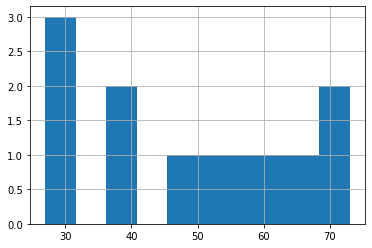

In [23]:
df.query('City == "Tulsa" and Low_High == "Avg. low"').Temp_F.hist()

**plot of the average monthly low tempurature in Tulsa.**

Identify the city with the highest high tempurature in each month.

In [24]:
df[df.Temp_F == df.groupby('Month').Temp_F.transform(max)]

,City,Low_High,Month,Temp_F
0,Oklahoma City,Avg. high,Jan,50
4,Lawton,Avg. high,Jan,50
10,Lawton,Avg. high,Feb,56
16,Lawton,Avg. high,March,65
18,Oklahoma City,Avg. high,April,73
22,Lawton,Avg. high,April,73
28,Lawton,Avg. high,May,82
34,Lawton,Avg. high,June,90
40,Lawton,Avg. high,July,96
46,Lawton,Avg. high,Aug,95
